In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os

def apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0)
    return cv2.filter2D(image, -1, kernel)

def extract_features(image):
    # Apply Gabor filters with different orientations
    thetas = [np.pi * i / 4 for i in range(4)]  # 0, 45, 90, 135 degrees
    features = []
    for theta in thetas:
        filtered_image = apply_gabor_filter(image, ksize=13, sigma=1, theta=theta, lambd=7, gamma=0.5)
        features.append(np.mean(filtered_image))
        features.append(np.std(filtered_image))
    return features

# Read images from directory
# path = '/home/rtlink/jiwon/paper_ws/heightmaps_30'
path = '/home/rtlink/jiwon/paper_ws/src/bumpypatch/static scene/output_clusters/output'
image_files = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in image_files]

# Extract features from images
X = [extract_features(img) for img in images]

# Apply k-means clustering
n_clusters = 3  # You can change this value depending on your needs
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# Create new folders for clusters
# base_output_folder = '/home/rtlink/jiwon/paper_ws/분류 기준/clusters'
base_output_folder = '/home/rtlink/jiwon/paper_ws/src/bumpypatch/static scene/output_clusters/output'
if not os.path.exists(base_output_folder):
    os.mkdir(base_output_folder)

for i in range(n_clusters):
    cluster_folder = os.path.join(base_output_folder, f"cluster_{i}")
    if not os.path.exists(cluster_folder):
        os.mkdir(cluster_folder)

# Save images to respective clusters
for i, label in enumerate(kmeans.labels_):
    output_path = os.path.join(base_output_folder, f"cluster_{label}", os.path.basename(image_files[i]))
    cv2.imwrite(output_path, images[i])

print(f"Images have been clustered and saved in {base_output_folder}")


Images have been clustered and saved in /home/rtlink/jiwon/paper_ws/src/bumpypatch/static scene/output_clusters/output


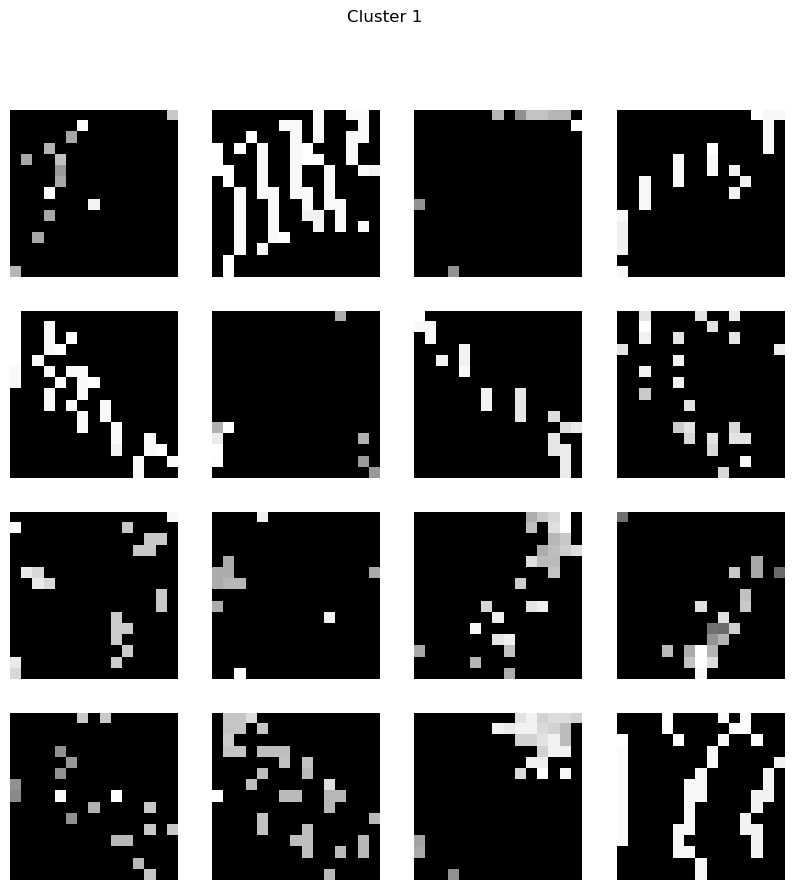

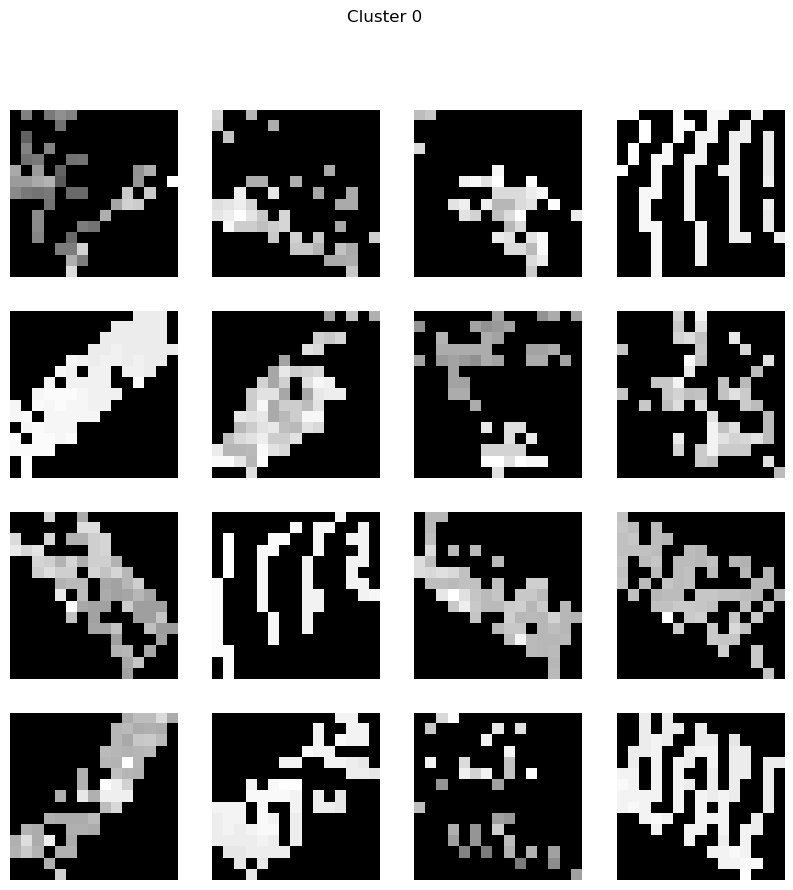

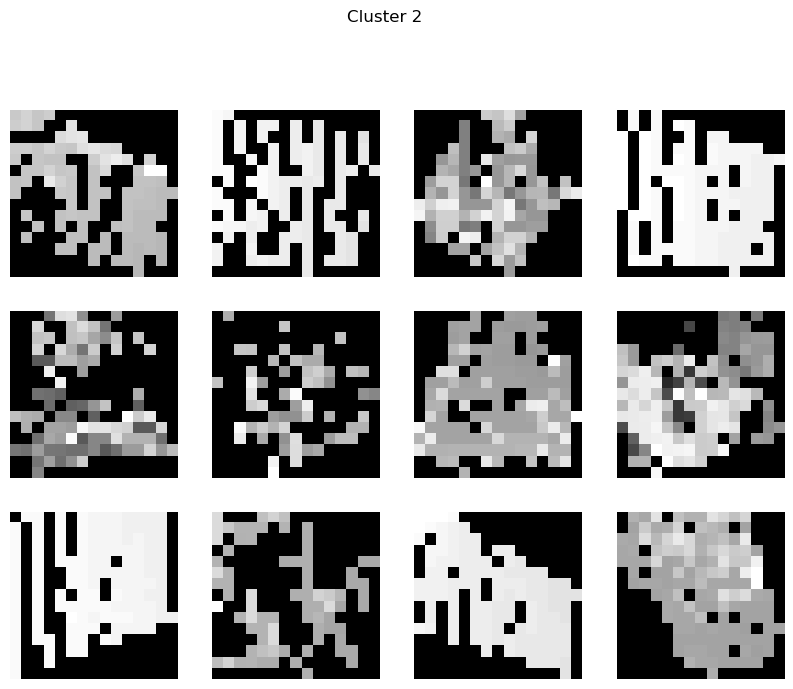

Clusters have been visualized by stripe pattern repetition.


In [3]:
import matplotlib.pyplot as plt

# def count_stripes(image, theta):
#     filtered_image = apply_gabor_filter(image, ksize=13, sigma=1, theta=theta, lambd=7, gamma=0.5)
#     local_maxima = (filtered_image == cv2.dilate(filtered_image, np.ones((3,3))))
#     return np.sum(local_maxima)

# def analyze_cluster(cluster_path):
#     image_files = [os.path.join(cluster_path, f) for f in os.listdir(cluster_path) if os.path.isfile(os.path.join(cluster_path, f))]
#     images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in image_files]
#     stripe_counts = [count_stripes(img, theta=np.pi/4) for img in images]  # Analyzing stripes at 45 degrees
#     return np.mean(stripe_counts)

def count_stripes(image, theta):
    filtered_image = apply_gabor_filter(image, ksize=13, sigma=1, theta=theta, lambd=7, gamma=0.5)
    local_maxima = (filtered_image == cv2.dilate(filtered_image, np.ones((3,3))))
    return np.sum(local_maxima)

def analyze_cluster(cluster_path):
    image_files = [os.path.join(cluster_path, f) for f in os.listdir(cluster_path) if os.path.isfile(os.path.join(cluster_path, f))]
    images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in image_files]
    thetas = [np.pi * i / 4 for i in range(8)]  # 0, 45, 90, ..., 315 degrees
    stripe_counts = [np.mean([count_stripes(img, theta=t) for t in thetas]) for img in images]
    return np.mean(stripe_counts)

# ... rest of the code remains the same ...


cluster_stripe_counts = {}
for i in range(n_clusters):
    cluster_path = os.path.join(base_output_folder, f"cluster_{i}")
    cluster_stripe_counts[i] = analyze_cluster(cluster_path)

# Sort clusters by mean stripe count
# sorted_clusters = sorted(cluster_stripe_counts.items(), key=lambda x: x[1], reverse=True)
sorted_clusters = sorted(cluster_stripe_counts.items(), key=lambda x: x[1])

# Visualize clusters
for cluster_index, _ in sorted_clusters:
    cluster_path = os.path.join(base_output_folder, f"cluster_{cluster_index}")
    image_files = [os.path.join(cluster_path, f) for f in os.listdir(cluster_path) if os.path.isfile(os.path.join(cluster_path, f))]
    images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in image_files]

    plt.figure(figsize=(10, 10))
    for idx, img in enumerate(images[:16]): # Displaying the first 16 images from each cluster
        plt.subplot(4, 4, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Cluster {cluster_index}")
    plt.show()

print("Clusters have been visualized by stripe pattern repetition.")
